In [147]:
import pandas as pd 
import numpy as np
df_sal=pd.read_csv('mnc_salary.csv')
df_sal=pd.DataFrame(df_sal)
df_sal.head()

import warnings
warnings.filterwarnings('ignore')

In [148]:
df_sal.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [149]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [150]:
df_sal.corr()

,Number,Age,Weight,Salary
Number,1.000000,0.028724,0.206921,-0.112386
Age,0.028724,1.000000,0.087183,0.213459
Weight,0.206921,0.087183,1.000000,0.138321
Salary,-0.112386,0.213459,0.138321,1.000000


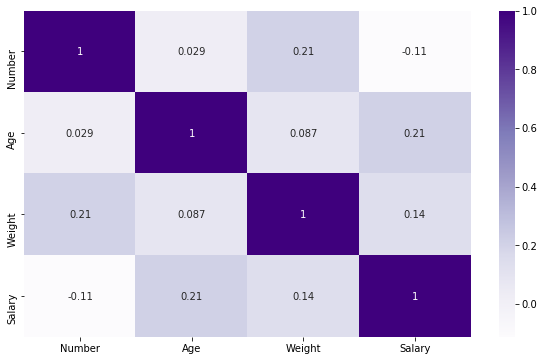

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_sal.corr(),cmap='Purples',annot=True)

In [152]:
df_sal.drop(['Name','DOJ'],axis=1,inplace=True)

In [153]:
df_sal

,Team,Number,Position,Age,Weight,College,Salary
0,Boston Celtics,0,PG,25,180,Texas,7730337.0
1,Boston Celtics,99,SF,25,235,Marquette,6796117.0
2,Boston Celtics,30,SG,27,205,Boston University,NaN
3,Boston Celtics,28,SG,22,185,Georgia State,1148640.0
4,Boston Celtics,8,PF,29,231,NaN,5000000.0
...,...,...,...,...,...,...,...
452,Utah Jazz,41,PF,20,234,Kentucky,2239800.0
453,Utah Jazz,8,PG,26,203,Butler,2433333.0
454,Utah Jazz,25,PG,24,179,NaN,900000.0
455,Utah Jazz,21,C,26,256,NaN,2900000.0


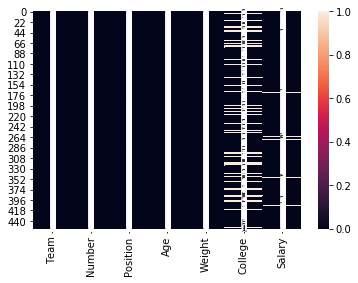

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_sal.isnull(),annot=True)
plt.show()

In [155]:
df_sal.isnull().sum()

Team         0
Number       0
Position     0
Age          0
Weight       0
College     84
Salary      11
dtype: int64

In [156]:
df_sal.isnull()

,Team,Number,Position,Age,Weight,College,Salary
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
452,False,False,False,False,False,False,False
453,False,False,False,False,False,False,False
454,False,False,False,False,False,True,False
455,False,False,False,False,False,True,False


In [157]:
df_sal.head()

,Team,Number,Position,Age,Weight,College,Salary
0,Boston Celtics,0,PG,25,180,Texas,7730337.0
1,Boston Celtics,99,SF,25,235,Marquette,6796117.0
2,Boston Celtics,30,SG,27,205,Boston University,NaN
3,Boston Celtics,28,SG,22,185,Georgia State,1148640.0
4,Boston Celtics,8,PF,29,231,NaN,5000000.0


In [158]:
df_sal['Salary'].replace(np.NaN,df_sal["Salary"].mean(),inplace=True)

In [159]:
df_sal.dropna(inplace=True)

In [160]:
df_sal.isnull().sum()

Team        0
Number      0
Position    0
Age         0
Weight      0
College     0
Salary      0
dtype: int64

In [161]:
df_sal.head()

,Team,Number,Position,Age,Weight,College,Salary
0,Boston Celtics,0,PG,25,180,Texas,7.730337e+06
1,Boston Celtics,99,SF,25,235,Marquette,6.796117e+06
2,Boston Celtics,30,SG,27,205,Boston University,4.842684e+06
3,Boston Celtics,28,SG,22,185,Georgia State,1.148640e+06
6,Boston Celtics,55,PF,21,235,LSU,1.170960e+06


In [162]:
df_sal.dtypes

Team         object
Number        int64
Position     object
Age           int64
Weight        int64
College      object
Salary      float64
dtype: object

In [163]:
for i in df_sal[["Age","College","Position",'Salary']]:
    print(df_sal[i].value_counts())

24    43
25    42
27    36
23    34
26    32
28    28
22    23
30    20
29    18
31    17
20    15
21    14
32     9
36     9
33     8
35     8
34     7
38     3
40     2
37     2
19     2
39     1
Name: Age, dtype: int64
Kentucky           22
Duke               20
Kansas             18
North Carolina     16
UCLA               15
                   ..
Norfolk State       1
San Diego State     1
Old Dominion        1
Cleveland State     1
Wyoming             1
Name: College, Length: 118, dtype: int64
SG    89
PF    84
PG    80
SF    71
C     49
Name: Position, dtype: int64
9.472760e+05    26
8.450590e+05    18
5.250930e+05    10
4.842684e+06     9
9.813480e+05     6
                ..
3.333333e+06     1
1.824360e+06     1
8.042895e+06     1
2.489530e+06     1
9.463484e+06     1
Name: Salary, Length: 257, dtype: int64


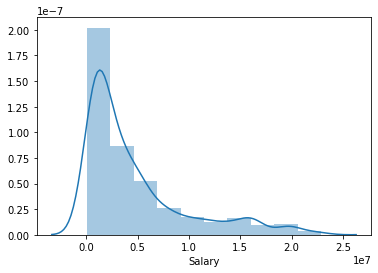

In [164]:
import seaborn as sns
sns.distplot(df_sal["Salary"],bins=10)

In [165]:
df_sal["Salary"].describe()

count    3.730000e+02
mean     4.625677e+06
std      5.057520e+06
min      5.572200e+04
25%      1.007026e+06
50%      2.637720e+06
75%      5.758680e+06
max      2.287500e+07
Name: Salary, dtype: float64

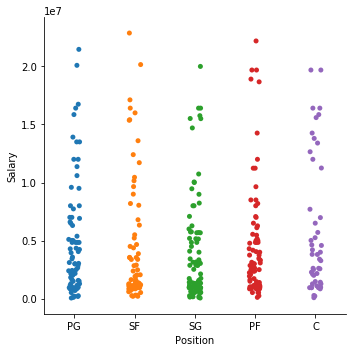

In [166]:
sns.catplot(x='Position',y="Salary",data=df_sal)

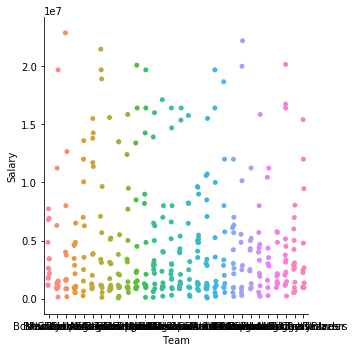

In [167]:
sns.catplot(x='Team',y="Salary",data=df_sal)

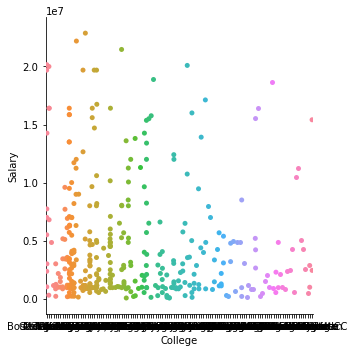

In [168]:
sns.catplot(x='College',y="Salary",data=df_sal)

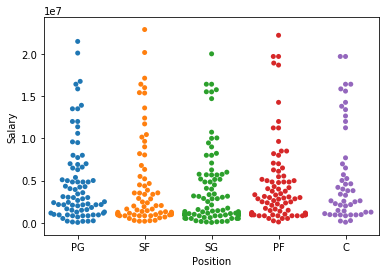

In [169]:
sns.swarmplot(x='Position',y="Salary",data=df_sal)

In [170]:
n = 10
for i in df_sal[["College","Position","Team"]]:
    print(df_sal[i].value_counts()[:n])

Kentucky          22
Duke              20
Kansas            18
North Carolina    16
UCLA              15
Arizona           13
Florida           10
Texas              9
Syracuse           8
USC                7
Name: College, dtype: int64
SG    89
PF    84
PG    80
SF    71
C     49
Name: Position, dtype: int64
Memphis Grizzlies         17
New Orleans Pelicans      16
Detroit Pistons           15
Philadelphia 76ers        15
Portland Trail Blazers    15
Milwaukee Bucks           14
Oklahoma City Thunder     14
Los Angeles Clippers      14
Brooklyn Nets             13
Phoenix Suns              13
Name: Team, dtype: int64


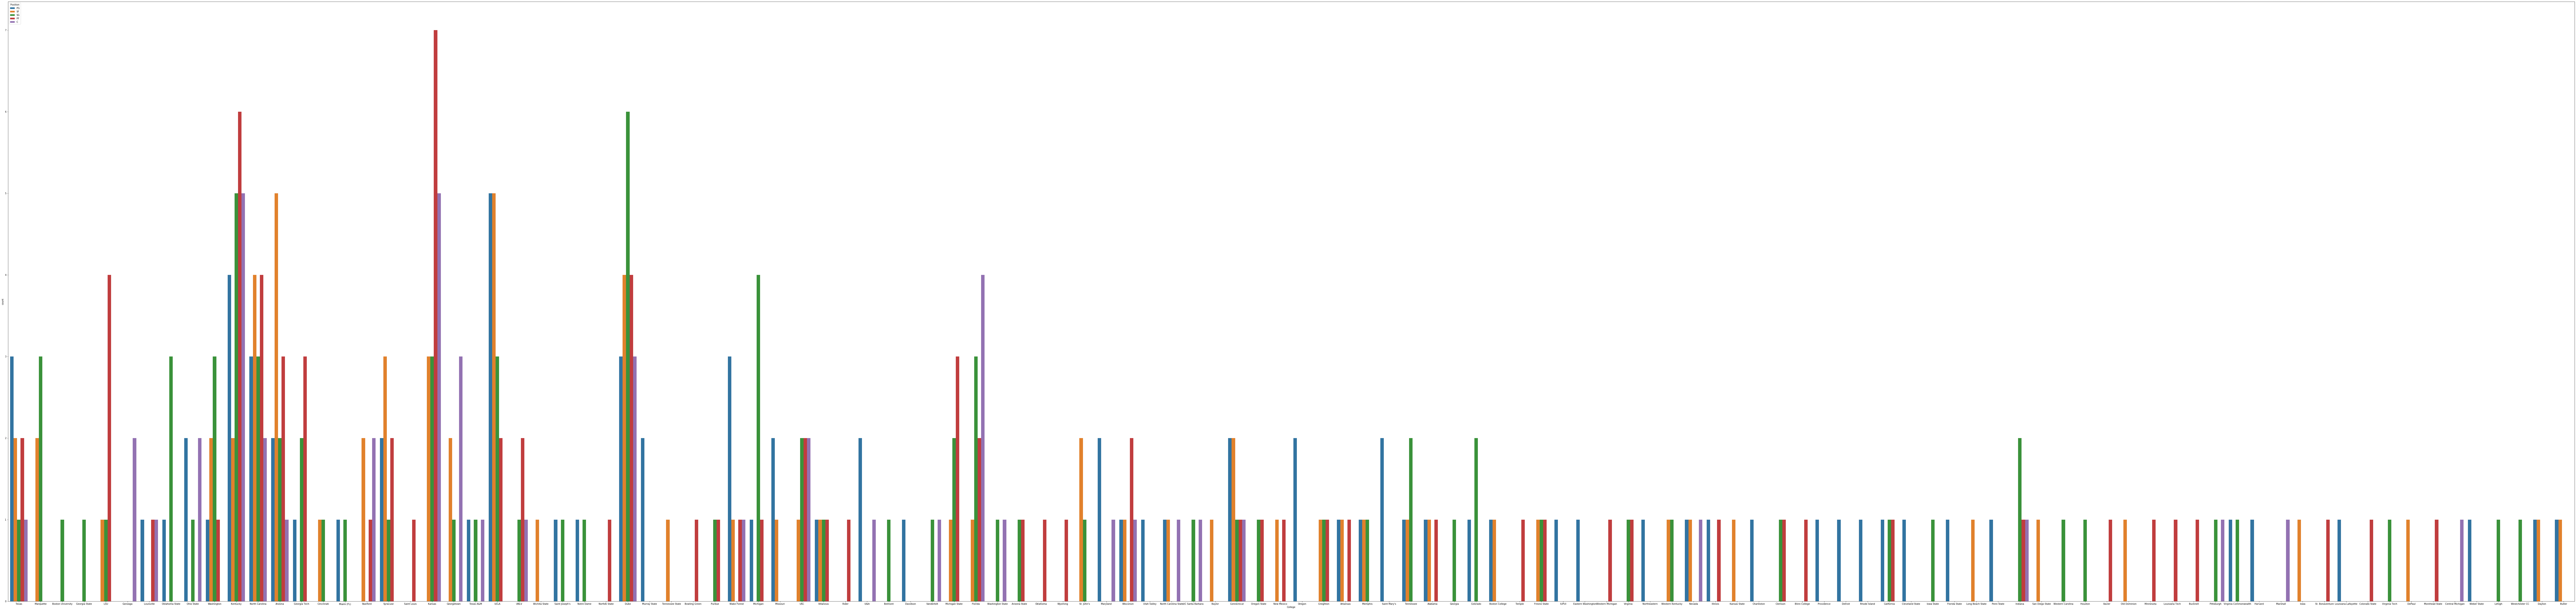

In [171]:
plt.figure(figsize=(200,48))
sns.countplot(df_sal['College'],hue=df_sal["Position"])

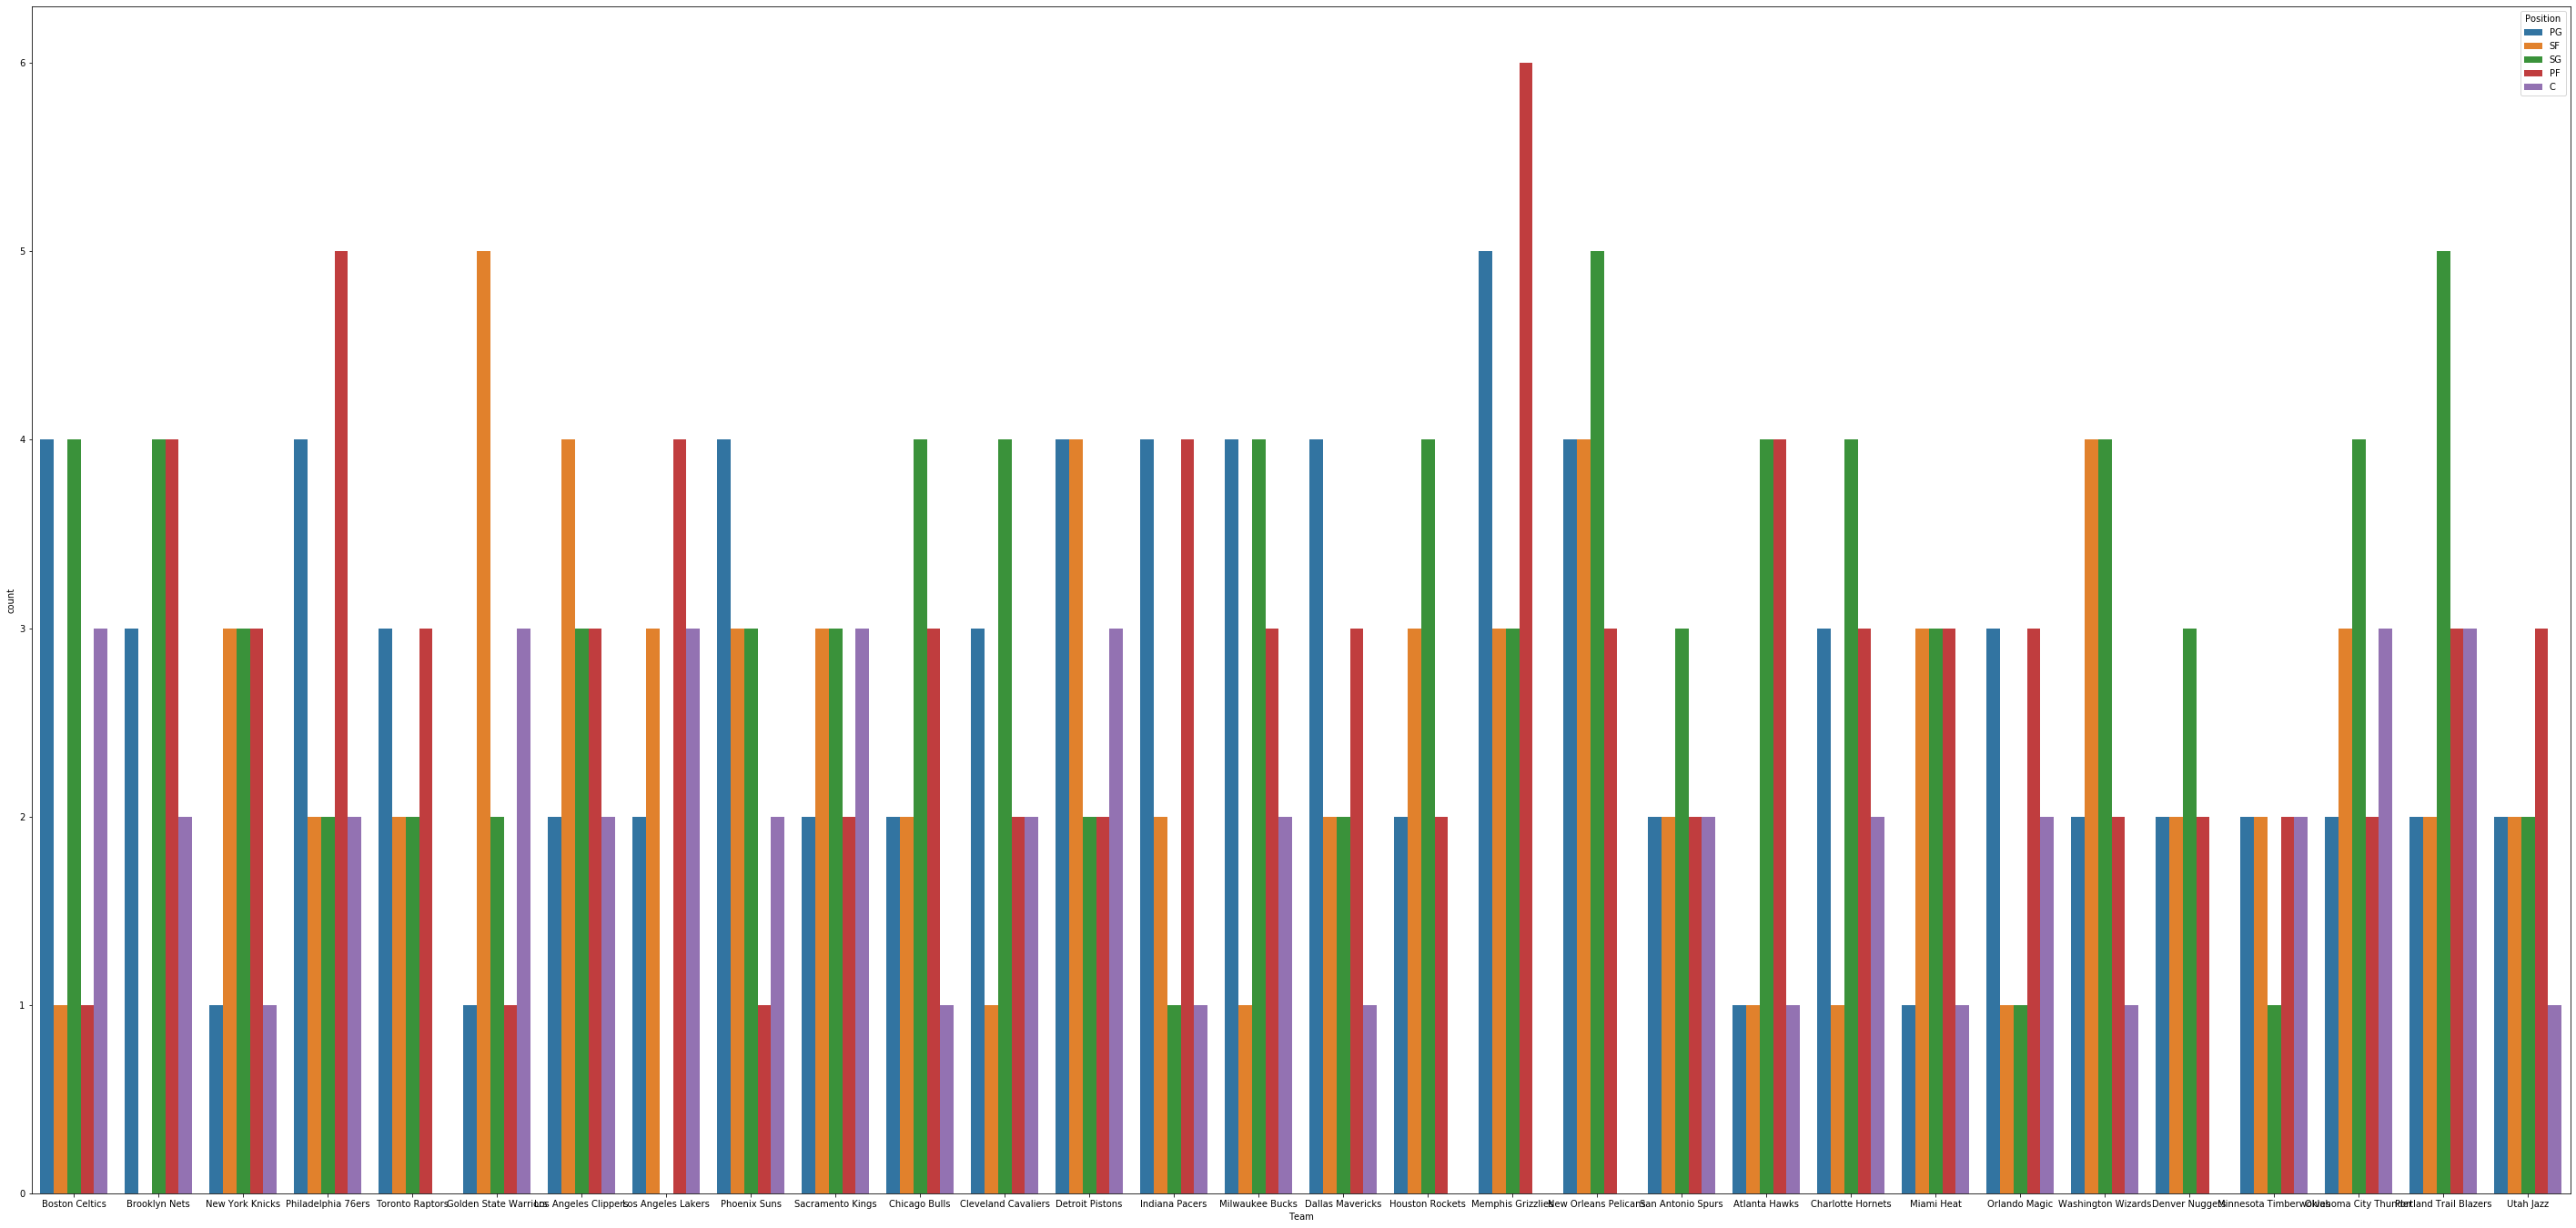

In [172]:
plt.figure(figsize=(50,24))
sns.countplot(df_sal['Team'],hue=df_sal["Position"])

In [173]:
df_sal_new=pd.get_dummies(df_sal,drop_first=True)

In [174]:
#removing outliers
from scipy.stats import zscore
z=abs(zscore(df_sal_new[["Age","Weight","Salary"]]))
z

array([[0.38842217, 1.57865286, 0.61469468],
       [0.38842217, 0.61240752, 0.42972757],
       [0.08273708, 0.58271633, 0.04296552],
       ...,
       [1.5663203 , 0.57257006, 0.472382  ],
       [0.15284255, 0.66239125, 0.43406422],
       [0.15284255, 0.45305767, 0.72829007]])

In [175]:
threshold=3
print(np.where(z>3))

(array([ 28,  83, 136, 250, 254, 282, 289, 336], dtype=int64), array([2, 2, 2, 0, 0, 2, 2, 2], dtype=int64))


In [176]:
df_sal_final=df_sal_new[(z<3).all(axis=1)]

In [177]:
df_sal_final.shape

(365, 154)

In [178]:
df_sal_new.shape

(373, 154)

In [179]:
df_sal_final.skew()

Number                       1.435429
Age                          0.708745
Weight                       0.034498
Salary                       1.564809
Team_Boston Celtics          5.032076
                              ...    
College_Western Michigan    19.104973
College_Wichita State       19.104973
College_Wisconsin            8.401998
College_Wyoming             19.104973
College_Xavier              19.104973
Length: 154, dtype: float64

In [180]:
from scipy.stats import boxcox
df_sal_new["Salary"]=boxcox(df_sal_new['Salary'],0)

In [181]:
from scipy.stats import boxcox
df_sal_new["Age"]=boxcox(df_sal_new['Age'],0)

In [182]:
x=df_sal_final.drop(columns=["Salary"])
y=df_sal_final[["Salary"]]

In [183]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [184]:
x.shape

(365, 153)

In [185]:
y.shape

(365, 1)

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [187]:
max_r_score=0

for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lm=linear_model.LinearRegression()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    scr=lm.score(x_train,y_train)
    coef=lm.coef_
    intercept=lm.intercept_
    print()
    print("score corresponding to random state:",r_state,'is:',scr)
    if scr>max_r_score:
        max_r_score=scr
final_r_state=r_state
print()
print()
print("Max score corresponding to",final_r_state,'is',max_r_score)


score corresponding to random state: 42 is: 0.4435329983868678

score corresponding to random state: 43 is: 0.47343590407835345

score corresponding to random state: 44 is: 0.4609006211345803

score corresponding to random state: 45 is: 0.46824394784847306

score corresponding to random state: 46 is: 0.5348817556448655

score corresponding to random state: 47 is: -1.41515549752364

score corresponding to random state: 48 is: 0.5615838975555489

score corresponding to random state: 49 is: 0.45607586580698034

score corresponding to random state: 50 is: 0.5243488954870575

score corresponding to random state: 51 is: 0.4520908291556087

score corresponding to random state: 52 is: -1.5843090660383055

score corresponding to random state: 53 is: 0.5685131179517731

score corresponding to random state: 54 is: 0.5191004915490094

score corresponding to random state: 55 is: 0.5389701263637072

score corresponding to random state: 56 is: 0.502402200135017

score corresponding to random state: 

In [188]:
print(r2_score(y_test,y_pred))

-2.484053391593415e+29


In [189]:
print("Max accuracy Score corresponding to random state",final_r_state,"is",max_r_score)

Max accuracy Score corresponding to random state 100 is 0.57575835497454


In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.20)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [191]:
from sklearn.externals import joblib
joblib.dump(lm,'lm_mncsalarydataset.pkl')

['lm_mncsalarydataset.pkl']